In [175]:
#Description: Sentiment analysis of a topic using tweets from twitter through twitter API

In [176]:
#importing required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

In [177]:
#load data
keys = open('keys.txt','r').read().splitlines()
api_key = keys[0]
api_key_secret = keys[1]
access_token = keys[2]
access_token_secret = keys[3]

In [178]:
#Creating an Authentication Object
auth_handler = tweepy.OAuthHandler(api_key,api_key_secret)

#Set access token and access token secret
auth_handler.set_access_token(access_token,access_token_secret)

#Creating an API object
api = tweepy.API(auth_handler,wait_on_rate_limit=True)


In [179]:
#Extract 100 tweets on a topic
topic = 'Cricket'
tweet_count = 100

#tweets = api.search(q = topic,lang = 'en', count = tweet_count, tweet_mode='extended')

#Extract 100 tweets from a twitter user
tweets = api.user_timeline(screen_name = 'Billgates' , lang = 'en', count = tweet_count, tweet_mode='extended')


i = 1
for tweet in tweets[0:5]:
    print(str(i) + ') ' +tweet.full_text + "\n")
    i += 1

1) RT @USAID: With nearly six decades in the medical profession, Dr. Louisa Samonsia thought she had seen it all. Then, COVID-19 hit.

Learn h…

2) Stopping Alzheimer’s requires more eyes on the problem. ADDI @AlzData recently hosted their 1st Data Challenge. I was inspired to see more than 1,200+ people from 65+ countries/regions join the fight. https://t.co/kTovX2SWch

3) It’s really encouraging to see these results. Dengue fever infects hundreds of millions of people a year and causes debilitating disease. This incredible technique could also be effective at stopping the spread of other viruses like Zika and Chikungunya. https://t.co/AdFpD1hW5c

4) This important commitment builds on the @gatesfoundation's efforts to support partners working to create a more equal world. https://t.co/M0RO0s62ZP

5) I am truly grateful for his wisdom and leadership, and most of all for his enduring friendship. Warren will continue to inspire our foundation as we work to fight poverty and help million

In [180]:
#Create a dataframe and store all the tweets
d = [tweet.full_text for tweet in tweets]
df = pd.DataFrame({'Tweets' : d })

df.head()

,Tweets
0,RT @USAID: With nearly six decades in the medi...
1,Stopping Alzheimer’s requires more eyes on the...
2,It’s really encouraging to see these results. ...
3,This important commitment builds on the @gates...
4,I am truly grateful for his wisdom and leaders...


In [181]:
#Cleaning of data
def clean_data(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions
    text = text.replace('#', '') #Remove '#'
    text = re.sub(r'RT[\s]+', '', text) #Remove 'RT'
    text = re.sub(r':', '', text) #Remove ':'
    text = re.sub(r'http\S+', '', text) #Remove 'hyperlink'
    text = text.replace('\n',' ')
    text = text.replace('_',' ')
    text = text.replace('[VIDEO]', '')
    return text

df['Tweets'] = df['Tweets'].apply(clean_data)
df.head()

,Tweets
0,With nearly six decades in the medical profes...
1,Stopping Alzheimer’s requires more eyes on the...
2,It’s really encouraging to see these results. ...
3,This important commitment builds on the 's eff...
4,I am truly grateful for his wisdom and leaders...


In [182]:
#Create function to get subjectivity and polarity
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

#Create Columns for subjectivity and polarity
df['Subjectivity'] = df['Tweets'].apply(get_subjectivity)
df['Polarity'] = df['Tweets'].apply(get_polarity)

df

,Tweets,Subjectivity,Polarity
0,With nearly six decades in the medical profes...,0.200000,0.050000
1,Stopping Alzheimer’s requires more eyes on the...,0.416667,0.333333
2,It’s really encouraging to see these results. ...,0.568750,0.393750
3,This important commitment builds on the 's eff...,0.583333,0.300000
4,I am truly grateful for his wisdom and leaders...,0.500000,0.318182
...,...,...,...
95,How to Avoid a Climate Disaster is available n...,0.633333,0.433333
96,"In a digital cover story, we talked to about...",0.227273,0.068182
97,The world’s power to invent makes me hopeful a...,0.000000,0.000000
98,"To avoid a climate disaster, we need to elimin...",0.741667,0.391667


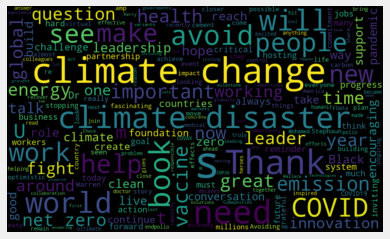

In [183]:
#Visualize the Sentiments using wordcloud
all_words = ' '.join([tweet for tweet in df['Tweets']] )
cloud = WordCloud(width=1000, height=600, random_state=21, max_font_size= 120).generate(all_words)

plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [184]:
#Create a function to compute, neutral and positive analysis
def get_analysis(score):
    if score < 0:
        return 'Negative'
    elif score > 0:
        return 'Positive'
    else:
        return 'Neutral'

df['Analysis'] = df['Polarity'].apply(get_analysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,With nearly six decades in the medical profes...,0.200000,0.050000,Positive
1,Stopping Alzheimer’s requires more eyes on the...,0.416667,0.333333,Positive
2,It’s really encouraging to see these results. ...,0.568750,0.393750,Positive
3,This important commitment builds on the 's eff...,0.583333,0.300000,Positive
4,I am truly grateful for his wisdom and leaders...,0.500000,0.318182,Positive
...,...,...,...,...
95,How to Avoid a Climate Disaster is available n...,0.633333,0.433333,Positive
96,"In a digital cover story, we talked to about...",0.227273,0.068182,Positive
97,The world’s power to invent makes me hopeful a...,0.000000,0.000000,Neutral
98,"To avoid a climate disaster, we need to elimin...",0.741667,0.391667,Positive


In [185]:
#Print all  negative tweets
sorted_df = df.sort_values(by = 'Polarity', ignore_index=True)

i=0
for tweet in sorted_df['Tweets']:
    if sorted_df['Analysis'][i] == 'Negative':
        print(str(i+1)+') '+tweet+'\n')
        i+=1



1) It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects  

2)  The Weekly Planet Lately, Bill Gates has been thinking about what he calls the “hard stuff” of climate change. These hard…

3)  Over the past few weeks health workers in Ethiopia 🇪🇹, Nigeria 🇳🇬, Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…

4)  Black folks have questions about the COVID-19 vaccine. I sat down w/ Black healthcare workers &amp; they answered my questions.…

5) Communities of color have been hit hard by COVID-19. One of the reasons why parts of the medical system often fail Black and brown people is because it’s not designed with them in mind. Dr. Stephaun Wallace wants to change that. 

6)  "People who think a plan is easy are wrong. People who think a plan is impossible are wrong. It's super hard and very broad,…

7) Dr. Stephaun Wallace () has spent the last year helping make COVID-19 vaccines work for everybody. Stephaun and h

In [186]:
#Printing all Positive Tweets
sorted_df = df.sort_values(by = 'Polarity',ascending=False, ignore_index=True)

i=0
for tweet in sorted_df['Tweets']:
    if sorted_df['Analysis'][i] == 'Positive':
        print(str(i+1)+') '+tweet+'\n')
        i+=1

1) Against the odds,  became a doctor and is helping his country recover from civil war, Ebola, and now COVID-19. This doctor’s life story is almost as remarkable as his work. 

2) Should you pick your nose?  You can read an excerpt from Matt Richtel’s fascinating book about the immune system on my blog to find the answer  

3) If you’re looking for a good book to read this summer, these are some of my favorites. 

4) The journalist  has created a fascinating beat for herself covering humanity’s impact on nature and our attempts to control it. Her latest book is a good reminder that we need to watch out for the unforeseen effects of our actions. 

5) Thanks for another great conversation ! 

6) The best way to prevent new variants from emerging is by stopping transmission of the virus altogether  

7) In this video, I answered some really good questions, including one about two really important numbers. Come ask me some questions of your own on  at 1115  

8) I named my book “How to Av

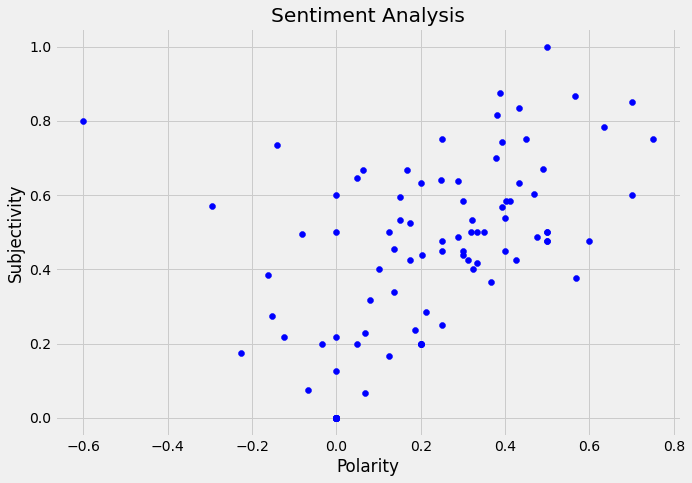

In [187]:
#Plot Polarity and Subjectivity
plt.figure(figsize=(10,7))
plt.scatter(df['Polarity'], df['Subjectivity'], color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [188]:
#Get percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
positive_tweet_percent = round(len(ptweets['Tweets'])/tweet_count*100, 1)
positive_tweet_percent

71.0

In [189]:
#Get percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
negative_tweet_percent = round(len(ntweets['Tweets'])/tweet_count*100, 1)
negative_tweet_percent

10.0

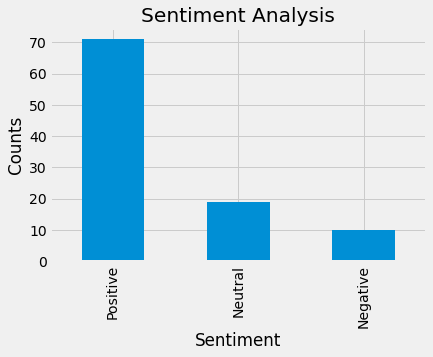

In [190]:
#Visualize Value counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()